# prepare the HM dataset

In [2]:
import os
import pandas as pd
article_path = os.path.expanduser('~/data/datasets/HMRecommendation/articles.csv')
customer_path = os.path.expanduser('~/data/datasets/HMRecommendation/customers.csv')
transaction_path = os.path.expanduser('~/data/datasets/HMRecommendation/transactions_train.csv')

articles = pd.read_csv(article_path, dtype=str)

# add path to the articles
im_path = []
im_root = os.path.expanduser('~/data/datasets/HMRecommendation/')
base_path = 'images'
for i,a in articles.iterrows():
    folder = a['article_id'][:3]
    file_name = a['article_id'] + '.jpg'
    path = os.path.join(im_root,base_path, folder, file_name)
    im_path.append(path)
articles['path'] = im_path

# only keep the article that has associated image
articles = articles[articles['path'].apply(os.path.exists)]



In [100]:
articles['product_type_no'].iloc[88]

'295'

In [77]:
num_set = set(articles['product_type_no'])
names = set(articles['product_type_name'])
name_dict = dict()
for num,name in zip(articles['product_type_no'], articles['product_type_name']):
    if num not in name_dict:
        name_dict[num]=name
    else:
        if(name_dict[num]!=name):
            print('wrong')
print(name_dict)
print(len(name_dict))
#print(len(num_set))
print(len(names))
print(len(set(name_dict.values())))

for v in name_dict.values():
    if v in names:
        names.remove(v)
    else:
        print(v)
#print(names)

{'253': 'Vest top', '306': 'Bra', '304': 'Underwear Tights', '302': 'Socks', '273': 'Leggings/Tights', '252': 'Sweater', '254': 'Top', '272': 'Trousers', '72': 'Hair clip', '532': 'Umbrella', '295': 'Pyjama jumpsuit/playsuit', '256': 'Bodysuit', '73': 'Hair string', '-1': 'Unknown', '308': 'Hoodie', '196': 'Sleep Bag', '74': 'Hair/alice band', '67': 'Belt', '87': 'Boots', '298': 'Bikini top', '59': 'Swimwear bottom', '286': 'Underwear bottom', '57': 'Swimsuit', '275': 'Skirt', '255': 'T-shirt', '265': 'Dress', '75': 'Hat/beanie', '307': 'Kids Underwear top', '274': 'Shorts', '259': 'Shirt', '69': 'Cap/peaked', '297': 'Pyjama set', '94': 'Sneakers', '81': 'Sunglasses', '245': 'Cardigan', '71': 'Gloves', '70': 'Earring', '66': 'Bag', '264': 'Blazer', '89': 'Other shoe', '267': 'Jumpsuit/Playsuit', '91': 'Sandals', '262': 'Jacket', '83': 'Umbrella', '277': 'Costumes', '305': 'Robe', '80': 'Scarf', '263': 'Coat', '78': 'Other accessories', '257': 'Polo shirt', '93': 'Slippers', '293': 'Nig

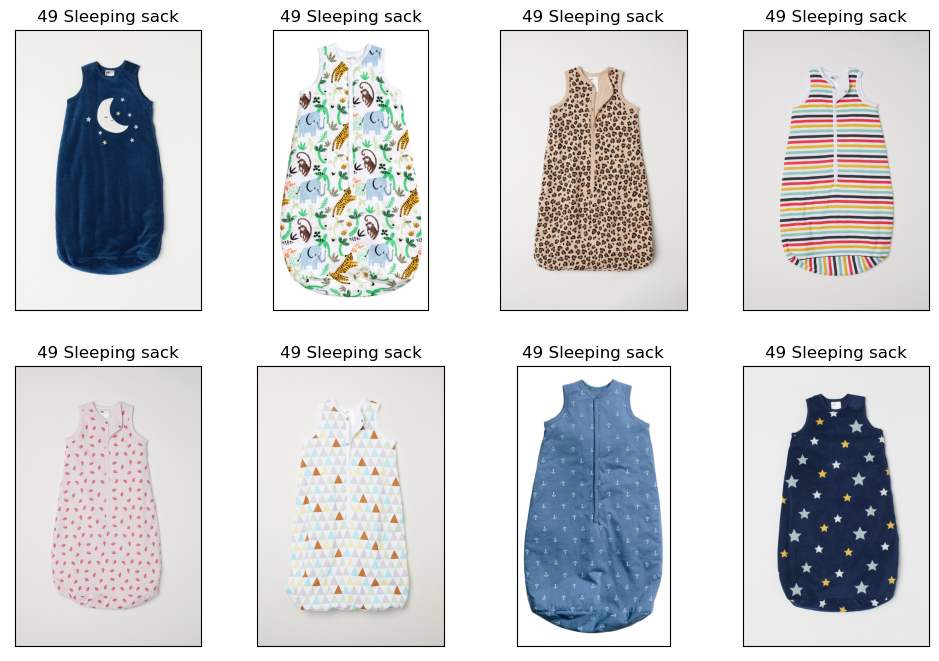

In [117]:
sample_num = 8
col_num = 4
row_num = sample_num//col_num
fig = plt.figure(figsize=(col_num*3, row_num*4))
im_num = 0
num = '49'
for i in range(len(articles)):
    if articles['product_type_no'].iloc[i] == num:
        im = Image.open(articles['path'].iloc[i])
        ax  = fig.add_subplot(sample_num//col_num, col_num, im_num+1)
        im_num+=1
        item_name = articles['product_type_name'].iloc[i]
        ax.set_title(num+' '+item_name,loc='center', wrap=True)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(im)
        if im_num>=sample_num:
            break
        
        

In [7]:
articles.keys()

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'path'],
      dtype='object')

## Visualize some samples of the dataset

In [27]:
def split_title_to_mul_lines(text, max_text_len=30):
    words = text.split()
    word_group = []
    cur_word=''
    for w in words:
        if(len(cur_word)+len(w)+1<=max_text_len):
            if cur_word != '':
                cur_word += ' '
            
            cur_word += w
        # this one word is too long
        elif(cur_word==''): 
            word_group.append(w)
        else:
            word_group.append(cur_word)
            cur_word = w
    word_group.append(cur_word)
    out='\n'.join(word_group)
    return out
    

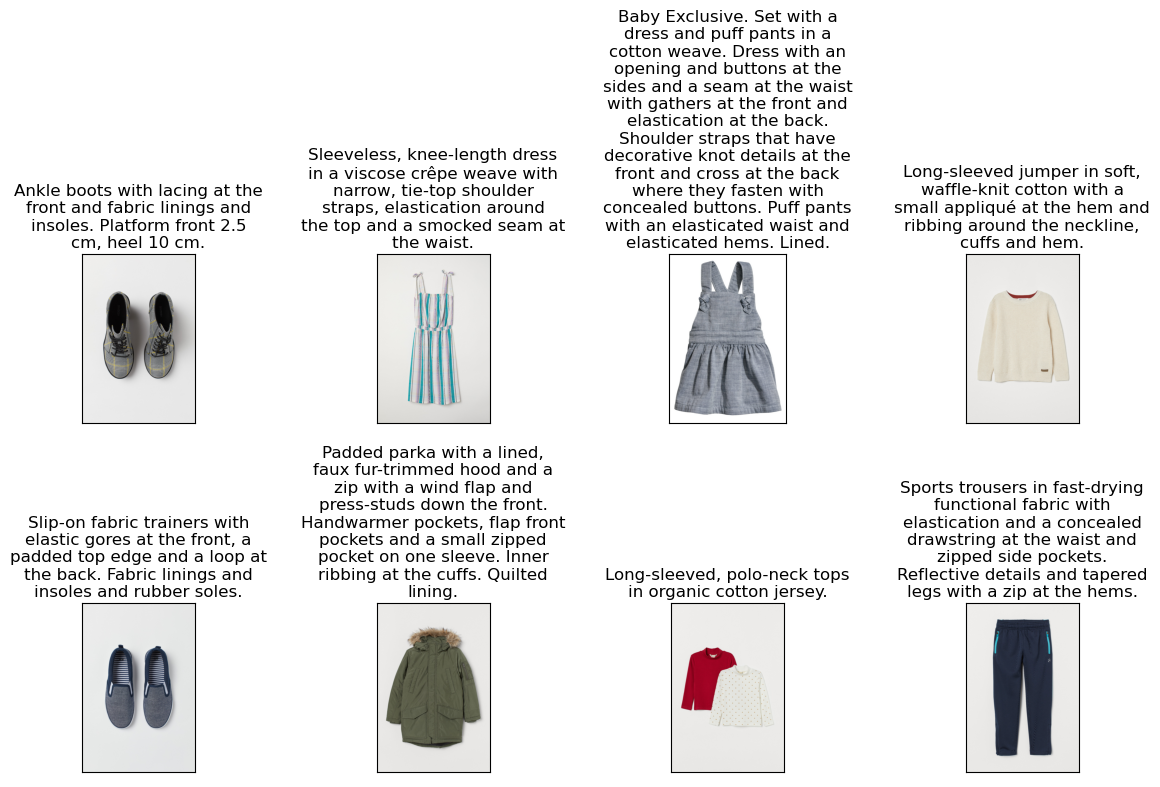

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from textwrap import wrap
sample_num = 8
col_num = 4
row_num = sample_num//col_num
article_num = len(articles)
fig = plt.figure(figsize=(col_num*3, row_num*4))

ori_images = []
texts = []

for k,i in enumerate(np.random.randint(0,article_num,size=sample_num)):
    
    title=articles['detail_desc'][i]
    texts.append(title)
    #title = split_title_to_mul_lines(title)
    title = '\n'.join(wrap(title,30))
    im = Image.open(articles['path'][i])
    ori_images.append(im)

    #plt.figure(figsize=(10,10))
    #plt.subplot(2, 4, k+1)
    ax  = fig.add_subplot(sample_num//col_num, col_num, k+1)
    ax.set_title(title,loc='center', wrap=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(im)
plt.tight_layout()


## Load CLIP Model

In [38]:
import clip

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [39]:
import numpy as np
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


# Image Preprocessing

We resize the input images and center-crop them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.

The second return value from `clip.load()` contains a torchvision `Transform` that performs this preprocessing.

In [40]:
preprocess

Compose(
    Resize(size=224, interpolation=PIL.Image.BICUBIC)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7fd41ff5c1f0>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [59]:
def truncate_text(text, n=77):
    return ' '.join(text.split()[:n])
images = [preprocess(im) for im in ori_images]
texts = [truncate_text(t) for t in texts]

# Building features

We normalize the images, tokenize each text input, and run the forward pass of the model to get the image and text features.

In [64]:
len(texts[2].split())

69

In [65]:
import torch
image_input = torch.tensor(np.stack(images)).cuda()
text_tokens = clip.tokenize([t for t in texts], truncate=True).cuda()

In [52]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

## Calculating cosine similarity

We normalize the features and calculate the dot product of each pair.

In [66]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

Text(0.5, 1.0, 'Cosine similarity between text and image features')

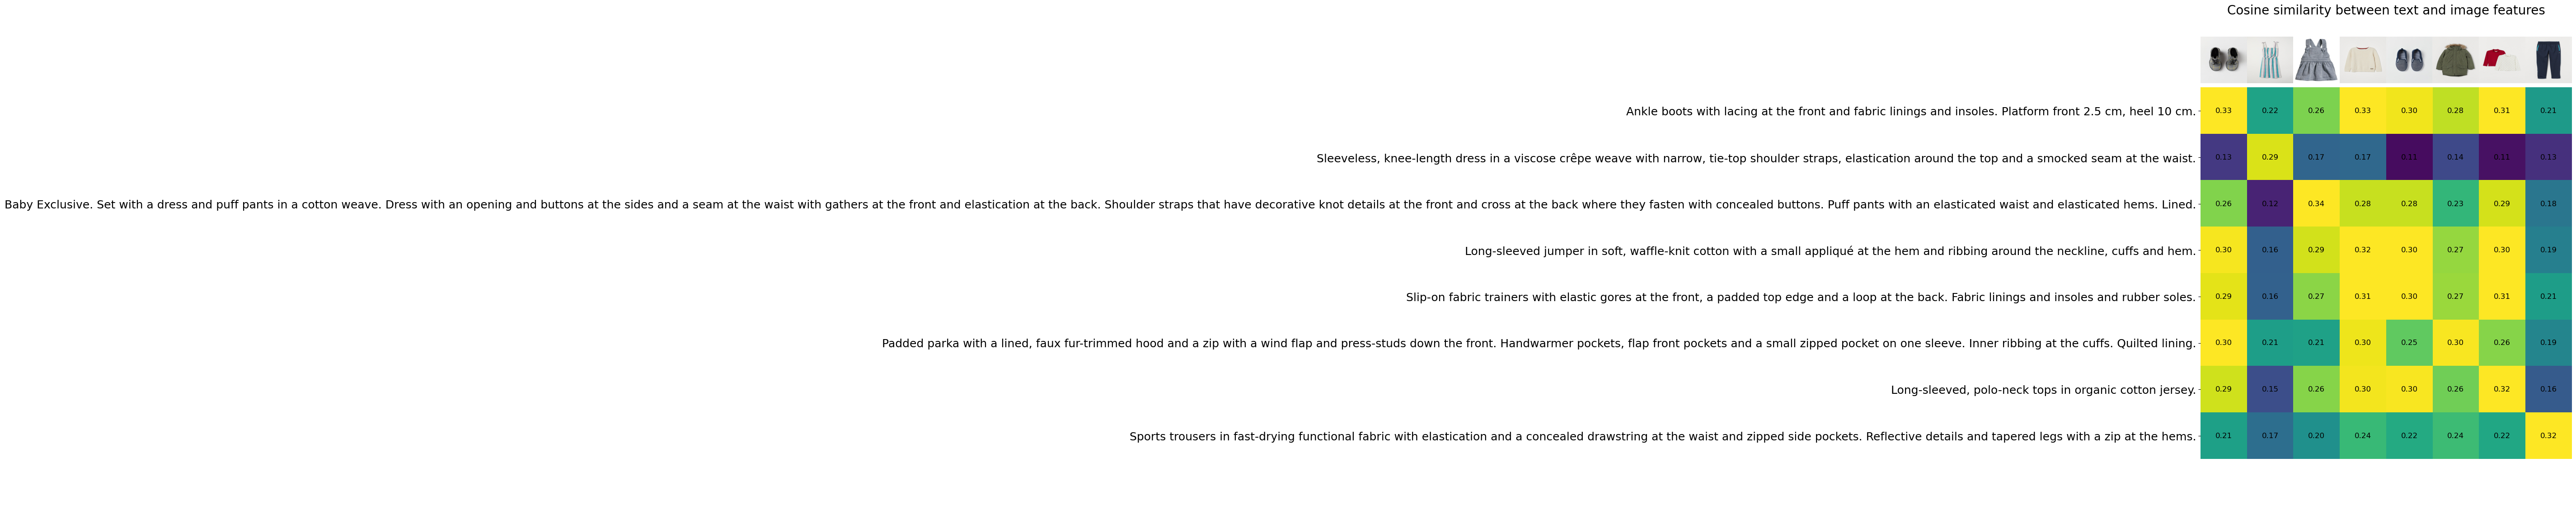

In [67]:
count = len(texts)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(ori_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)